# How to Write Markdown
A # sign will make a title. Adding more # signs will change the level of the title and make it smaller.

(A space line makes a new paragraph.)

Here is some math. For inline math, use single \$ sign. To make it a separate paragraph, use double \$\$.

$$ \alpha + \beta = \frac{\gamma}{\delta} $$

A list of items:
- hello
- nay
- ax

A list of numbered items:
1. aa
2. bb
3. cc

This word is **bold**, or *important*, or a `tick`

> To make things in a quotated formate, use left arrow >


Use three back quotes to insert some code
```python

def func():
    print "Hello World"
   
```

And more can be done with markdown. Google it!

# Lab 1. An Introduction to Pandas and Python

In [163]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

Python depends on packages for most of its functionality; these can be either built-in (such as sys), or third-party (like all the packages below). Either way you need to import the packages you need before using them.

## The Notebook

Look up http:/www.google.com Lets eat a burrito. $\alpha = \frac{\beta}{\gamma}$

Longer:

$$\alpha = \frac{\beta}{\gamma}$$

1. an item
2. another item
3. i like items

## Pandas

Get Cheatsheet:

from https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing


We read in some data from a CSV file. CSV files can be output by any spreadsheet software, and are plain text, so make a great way to share data. This dataset is from Goodreads: I scraped the highest regarded (according to Goodread's proprietary algorithm) books on that site. You'll see how to do such a scraping in the next lab.

In [164]:
df=pd.read_csv("all.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


Notice we have a table! A spreadsheet! And it indexed the rows. Pandas (borrowing from R) calls it a DataFrame. Lets see the types of the columns...

`df`, in python parlance, is an **instance** of the `pd.DataFrame` class, created by calling the `pd.read_csv` function, which cllas the DataFrame constructor inside of it. If you dont understand this sentence, dont worry, it will become clearer later. What you need to take away is that `df` is a dataframe object, and it has **methods**, or functions belonging to it, which allow it to do things. For example `df.head()` is a method that shows the first 5 rows of the dataframe.

![](files/pandastruct.png)

### The basics

In [165]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

The shape of the object is:

In [166]:
df.shape

(6000, 10)

6000 rows times 10 columns. A spredsheet is a table is a matrix. How can we access members of this **tuple** (brackets like so:() )

In [167]:
df.shape[0], df.shape[1]

(6000, 10)

These are the column names.

In [168]:
df.rating

0       4.40
1       4.41
2       3.56
3       4.23
4       4.23
5       4.25
6       4.22
7       4.38
8       3.79
9       4.18
10      4.03
11      3.72
12      4.36
13      4.05
14      3.72
15      4.09
16      3.92
17      4.58
18      3.60
19      4.28
20      4.02
21      4.14
22      4.11
23      4.20
24      3.75
25      3.94
26      4.43
27      3.79
28      4.04
29      3.94
        ... 
5970    3.97
5971    4.24
5972    4.19
5973    4.17
5974    3.99
5975    4.07
5976    4.23
5977    4.03
5978    3.99
5979    2.77
5980    3.84
5981    3.36
5982    4.09
5983    4.23
5984    4.02
5985    3.61
5986    4.06
5987    4.26
5988    4.34
5989    3.36
5990    4.12
5991    4.20
5992    3.89
5993    4.09
5994    4.37
5995    4.17
5996    3.99
5997    3.78
5998    3.91
5999    4.35
Name: rating, dtype: float64

As the diagram above shows, pandas considers a table (dataframe) as a pasting of many "series" together, horizontally.

In [169]:
type(df.rating), type(df)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### Querying

A spreadsheet is useless if you cant dice/sort/etc it. Here we look for all books with a rating less than 3. 

In [170]:
df.rating < 3

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5970    False
5971    False
5972    False
5973    False
5974    False
5975    False
5976    False
5977    False
5978    False
5979     True
5980    False
5981    False
5982    False
5983    False
5984    False
5985    False
5986    False
5987    False
5988    False
5989    False
5990    False
5991    False
5992    False
5993    False
5994    False
5995    False
5996    False
5997    False
5998    False
5999    False
Name: rating, dtype: bool

In [172]:
df.review_count[df.rating < 3]

2609       8
3738     368
5844    1399
5979     800
Name: review_count, dtype: object

In [173]:
df[df.rating < 3].review_count

2609       8
3738     368
5844    1399
5979     800
Name: review_count, dtype: object

This gives us `True`s and `False`s. Such a series is called a mask. If we count the number of `True`s, and divide by the total, we'll get the fraction of ratings $\lt$ 3. To do this numerically see this:

In [174]:
np.sum(df.rating < 3)

4

Why did that work?

In [176]:
print(1*True, 1*False)

1 0


So we ought to be able to do this

In [177]:
np.sum(df.rating < 3)/df.shape[0]

0.00066666666666666664

But we get a 0? Why? In Python 2.x division is **integer division** by default. So one can fix by converting the `df.shape[0]` to a float. However, in Python 3.x integer division is taken care of properly.

In [179]:
np.sum(df.rating < 3)/float(df.shape[0])

0.00066666666666666664

Notice that you could just find the average since the `True`s map to 1s.

In [180]:
np.mean(df.rating < 3.0)

0.00066666666666666664

Or directly, in Pandas, which works since `df.rating < 3` is a pandas Series.

In [181]:
(df.rating < 3).mean()

0.00066666666666666664

In [182]:
df.rating.mean(), df.rating.std()

(4.042200733577858, 0.2606608212818681)

### Filtering

Here are two ways to get a filtered dataframe

In [ ]:
df.query("rating > 4.5")

Here we create a mask and use it to "index" into the dataframe to get the rows we want.

In [ ]:
df[df.year < 0]

If you want to combine these conditions, use the second form and put '()' brackets around each condition. The query uses a boolean AND. Each condition ceates a mask of trues and falses.

In [ ]:
df[(df.year < 0) & (df.rating > 4)]#there were none greater than 4.5!

### Cleaning

We first check the datatypes. Notice that `review_count`, `rating_count` are of type `object` (which means they are either strings or Pandas couldnt figure what they are), while `year` is a float.

In [ ]:
df.dtypes

Suppose we try and fix this

In [ ]:
df['rating_count'] = df.rating_count.astype(int)
df['review_count'] = df.review_count.astype(int)
df['year'] = df.year.astype(int)

Oppos we got an error. Something is not right. Its trying to convert some python datatype: `None` into an int. This usually means data was missing. Was it?

In [ ]:
df[df.year.isnull()]

Aha, we had some incomplete data. Lets get rid of it

In [87]:
df = df[df.year.notnull()]
df.shape

(5993, 10)

We removed those 7 rows. Lets try the type conversion again

In [88]:
df['rating_count'] = df.rating_count.astype(int)
df['review_count'] = df.review_count.astype(int)
df['year'] = df.year.astype(int)

In [89]:
df.dtypes

rating          float64
review_count      int32
isbn             object
booktype         object
author_url       object
year              int32
genre_urls       object
dir              object
rating_count      int32
name             object
dtype: object

In [93]:
df.rating_count.unique()

array([2958974, 1284478, 2579564, ...,    2971,    3083,    3982], dtype=int64)

Much cleaner now!

### Visualizing

Pandas has handy built in visualization.

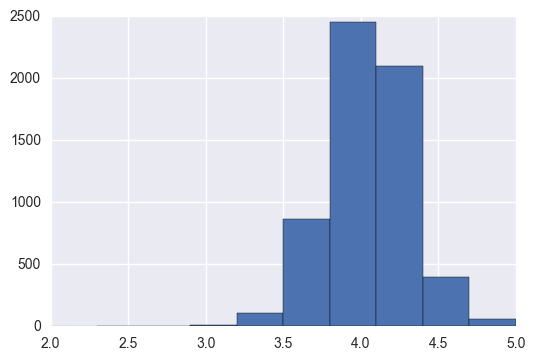

In [97]:
df.rating.hist();

We can do this in more detail, plotting against a mean, with cutom binsize or number of bins. Note how to label axes and create legends.

4.041997330218587 4.041997330218587 4.05


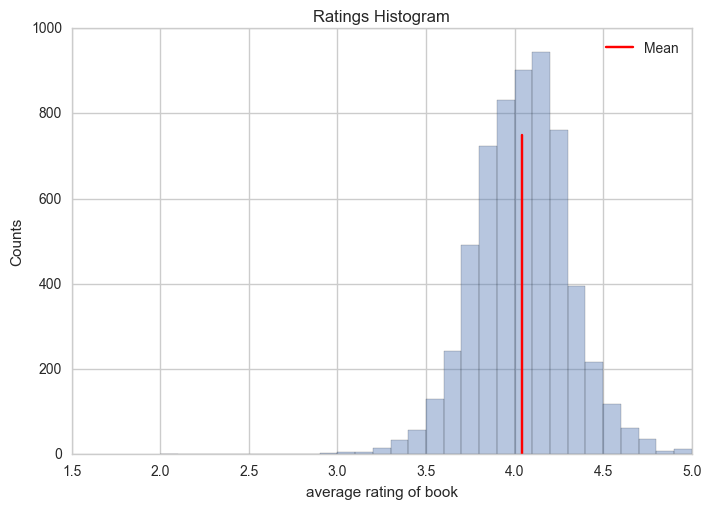

In [135]:
sns.set_context("notebook")
meanrat=df.rating.mean()
#you can get means and medians in different ways
print(meanrat, np.mean(df.rating), df.rating.median())
with sns.axes_style("whitegrid"):
    df.rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("average rating of book")
    plt.ylabel("Counts")
    plt.title("Ratings Histogram")
    plt.legend()
    #sns.despine()

One can see the sparseness of review counts. This will be important when we learn about recommendations: we'll have to *regularize* our models to deal with it.

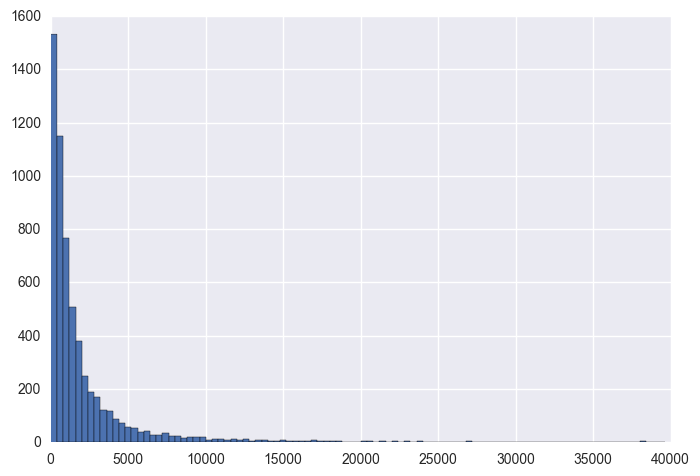

In [128]:
df.review_count.hist(bins=np.arange(0, 40000, 400));

The structure may be easier to see if we rescale the x-axis to be logarithmic.

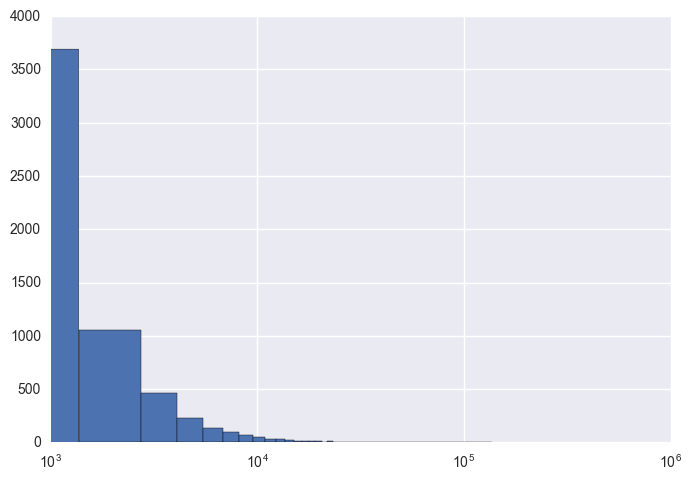

In [129]:
df.review_count.hist(bins=100)
plt.xscale("log")

Here we make a scatterplot in matplotlib of rating against year. By setting the alpha transparency low we can see how the density of highly rated books on goodreads has changed.

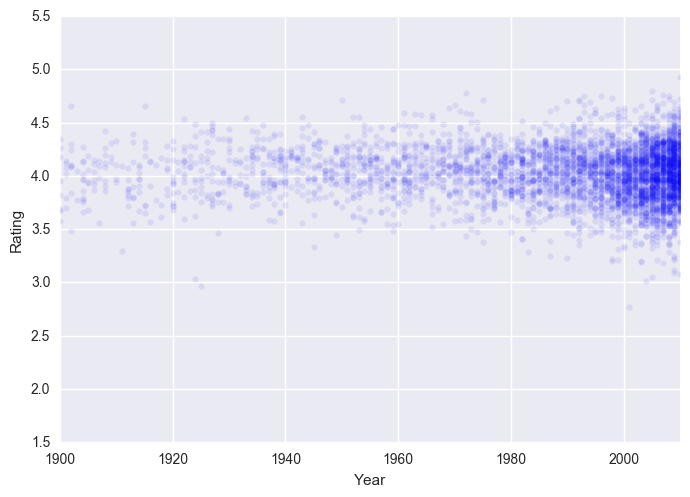

In [138]:
plt.scatter(df.year, df.rating, lw=0, alpha=.08)
plt.xlim([1900,2010])
plt.xlabel("Year")
plt.ylabel("Rating")

### Pythons and ducks

Notice that we used the series in the x-list and y-list slots in the `scatter` function in the `plt` module.

In working with python I always remember: a python is a duck.

What I mean is, python has a certain way of doing things. For example lets call one of these ways listiness. Listiness works on lists, dictionaries, files, and a general notion of something called an iterator.

A Pandas series plays like a python list:

In [140]:
alist=[1,2,3,4,5]

We can construct another list by using the syntax below, also called a list comprehension.

In [141]:
asquaredlist=[i*i for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

And then we can again make a scatterplot

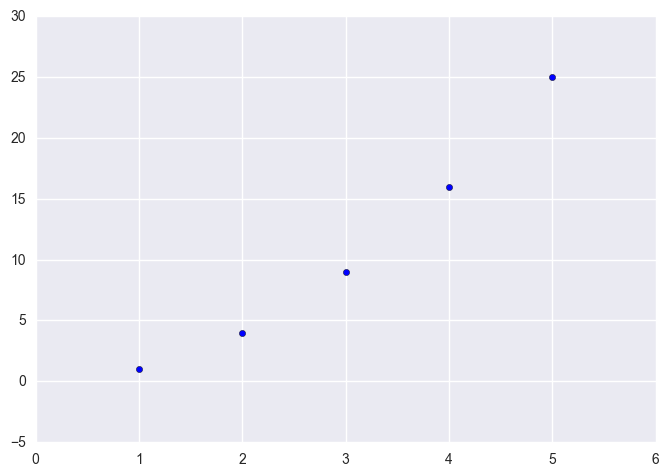

In [142]:
plt.scatter(alist, asquaredlist);

In [144]:
print(type(alist))

<class 'list'>


In other words, something is a duck if it quacks like a duck. A Pandas series quacks like a python list. They both support something called the iterator protocol, an notion of behaving in a "listy" way. And Python functions like `plt.scatter` will accept anything that behaves listy. Indeed here's one more example:

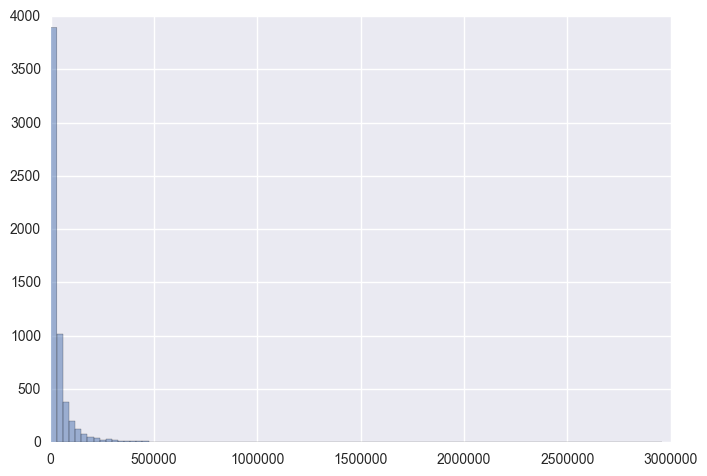

In [146]:
plt.hist(df.rating_count.values, bins=100, alpha=0.5);

In [151]:
print(type(df.rating_count), type(df.rating_count.values))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


Series and numpy lists behave similarly as well.


### Vectorization

Numpy arrays are a bit different from regular python lists, and are the bread and butter of data science. Pandas Series are built atop them. 

In [148]:
alist + alist

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [152]:
np.array(alist)

array([1, 2, 3, 4, 5])

In [153]:
np.array(alist) + np.array(alist)

array([ 2,  4,  6,  8, 10])

In [154]:
np.array(alist) ** 2

array([ 1,  4,  9, 16, 25])

In other words, operations on numpy arrays, and by extension, Pandas Series, are **vectorized**. You can add two numpy lists by just using `+` whereas the result isn't what you might expect for regular python lists. To add regular python lists elementwise, you will need to use a loop:

In [155]:
newlist=[]
for item in alist:
    newlist.append(item + item)
newlist

[2, 4, 6, 8, 10]

**Vectorization** is a powerful idiom, and we will use it a lot in this class. And, for almost all data intensive computing, we will use numpy arrays rather than python lists, as the python numerical stack is based on it. 

You have seen this in idea in spreadsheets where you add an entire column to another one.

Two final examples

In [160]:
a=np.array([1,2,3,4,5])
print(type(a))

b=np.array([1,2,3,4,5])
print(a*b)

<class 'numpy.ndarray'>
[ 1  4  9 16 25]


In [161]:
a+1

array([2, 3, 4, 5, 6])